# **Neural Networks**

In [1]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.2 MB/s eta 0:00:00


In [2]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 7.9 MB/s eta 0:00:00


In [3]:
!pip install tensorflow

In [4]:
!pip install scikit-multilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 1.5 MB/s eta 0:00:00


In [5]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,mean_absolute_error, accuracy_score, mean_squared_error, precision_score, f1_score,recall_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import itertools
import tensorflow.keras.backend as K
from sklearn.svm import SVC
from sklearn.metrics import recall_score
import re
import tensorflow as tf
import keras_tuner as kt
import keras

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/marialopez33/IA-Proyecto/main/new_data.csv')
df.head()

,Unnamed: 0,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Working Capital/Equity_Low,Working Capital/Equity_Medium,Cash Flow to Sales_High,Cash Flow to Sales_Low,Cash Flow to Liability_High,Cash Flow to Liability_Low,Cash Flow to Liability_Medium,CFO to Assets_High,CFO to Assets_Low,CFO to Assets_Medium
0,0,1,0.370594,0.424389,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0,0,1,0,0,0,1,0,0,1
1,1,1,0.464291,0.538214,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0,0,1,0,0,0,1,1,0,0
2,2,1,0.426071,0.499019,0.601450,0.998857,0.796403,0.808388,0.302035,0.780284,...,0,0,1,0,0,0,1,0,0,1
3,3,1,0.399844,0.451265,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0,0,1,0,0,1,0,1,0,0
4,4,1,0.465022,0.538432,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0,0,1,0,0,0,1,1,0,0


In [7]:
df.columns = df.columns.str.lstrip()

In [8]:
df = df.drop(df.columns[0], axis=1)

In [9]:
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower() for name in df.columns]
df.head()

,bankrupt?,r_o_a(_c) before interest and depreciation before interest,r_o_a(_a) before interest and % after tax,operating _gross _margin,operating _profit _rate,pre-tax net _interest _rate,after-tax net _interest _rate,non-industry income and expenditure/revenue,continuous interest rate (after tax),operating _expense _rate,...,working _capital/_equity__low,working _capital/_equity__medium,cash _flow to _sales__high,cash _flow to _sales__low,cash _flow to _liability__high,cash _flow to _liability__low,cash _flow to _liability__medium,c_f_o to _assets__high,c_f_o to _assets__low,c_f_o to _assets__medium
0,1,0.370594,0.424389,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,...,0,0,1,0,0,0,1,0,0,1
1,1,0.464291,0.538214,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,...,0,0,1,0,0,0,1,1,0,0
2,1,0.426071,0.499019,0.601450,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,...,0,0,1,0,0,0,1,0,0,1
3,1,0.399844,0.451265,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.078888e-04,...,0,0,1,0,0,1,0,1,0,0
4,1,0.465022,0.538432,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,7.890000e+09,...,0,0,1,0,0,0,1,1,0,0


In [10]:
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', name).lower() for name in df.columns]
df.head()

,bankrupt?,r_o_a(_c) before interest and depreciation before interest,r_o_a(_a) before interest and % after tax,operating _gross _margin,operating _profit _rate,pre-tax net _interest _rate,after-tax net _interest _rate,non-industry income and expenditure/revenue,continuous interest rate (after tax),operating _expense _rate,...,working _capital/_equity__low,working _capital/_equity__medium,cash _flow to _sales__high,cash _flow to _sales__low,cash _flow to _liability__high,cash _flow to _liability__low,cash _flow to _liability__medium,c_f_o to _assets__high,c_f_o to _assets__low,c_f_o to _assets__medium
0,1,0.370594,0.424389,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,...,0,0,1,0,0,0,1,0,0,1
1,1,0.464291,0.538214,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,...,0,0,1,0,0,0,1,1,0,0
2,1,0.426071,0.499019,0.601450,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,...,0,0,1,0,0,0,1,0,0,1
3,1,0.399844,0.451265,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.078888e-04,...,0,0,1,0,0,1,0,1,0,0
4,1,0.465022,0.538432,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,7.890000e+09,...,0,0,1,0,0,0,1,1,0,0


In [11]:
X = df.drop('bankrupt?', axis=1).values
Y = df['bankrupt?'].values
print (X.shape , Y.shape)

(6819, 114) (6819,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify=Y,test_size=0.30)
print(X_train.shape)
print(X_test.shape)

(4773, 114)
(2046, 114)


In [13]:
  #NORMALIZAR
def calcularMatrizCF(matrix,titulo):
    a = (matrix[0,0] +  matrix[0,1])
    b = (matrix[1,0] +  matrix[1,1])
    matrix[0,0] =  matrix[0,0] / a
    matrix[0,1] =  matrix[0,1] / a
    matrix[1,0] =  matrix[1,0] / b
    matrix[1,1] =  matrix[1,1] / b
    #MATRIZ DE CONFUSION
    sns.heatmap(matrix,annot=True)
    plt.xlabel('Label Pred')
    plt.ylabel('Label True')
    plt.title(titulo)
    print(matrix)

In [14]:
from tensorflow.keras import Input, Model

In [15]:
from tensorflow.keras.layers import Dense, Activation, Dropout

In [16]:
import tensorflow_addons as tfa

In [17]:
def simple_model():
    input_data = Input(shape=(X_train.shape[1],))
    x_1 = Dense(128,'relu')(input_data)
    x_2 = Dropout(0.3)(x_1)
    x_3 = Dense(64,'relu')(x_2)
    x_3 = Dense(32,'relu')(x_2)
    x_3 = Dense(16,'relu')(x_2)
    x_3 = Dropout(0.3)(x_3)
    x_4 = Dense(1,'sigmoid')(x_3)
    model = Model(inputs=input_data, outputs=x_4, name='Simple_Model')
    return model

In [18]:
model = simple_model()
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Recall()])

In [19]:
model.fit(X_train, y_train, batch_size=256, epochs=30, validation_split=0.2)

Epoch 1/30
15/15 [==============================] - 2s 28ms/step - loss: 0.0000e+00 - binary_accuracy: 0.5081 - recall: 0.4310 - val_loss: 0.0000e+00 - val_binary_accuracy: 0.9571 - val_recall: 0.0000e+00
Epoch 2/30
15/15 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - binary_accuracy: 0.9565 - recall: 0.0086 - val_loss: 0.0000e+00 - val_binary_accuracy: 0.9602 - val_recall: 0.0000e+00
Epoch 3/30
15/15 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - binary_accuracy: 0.9694 - recall: 0.0000e+00 - val_loss: 0.0000e+00 - val_binary_accuracy: 0.9602 - val_recall: 0.0000e+00
Epoch 4/30
15/15 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - binary_accuracy: 0.9696 - recall: 0.0000e+00 - val_loss: 0.0000e+00 - val_binary_accuracy: 0.9602 - val_recall: 0.0000e+00
Epoch 5/30
15/15 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - binary_accuracy: 0.9696 - recall: 0.0000e+00 - val_loss: 0.0000e+00 - val_binary_accura

In [20]:
y_pred = model.predict(X_test)

64/64 [==============================] - 0s 1ms/step


In [21]:
y_pred.mean()

0.0

In [22]:
def calcularMatrizCF(matrix,titulo):
    a = (matrix[0,0] +  matrix[0,1])
    b = (matrix[1,0] +  matrix[1,1])
    matrix[0,0] =  matrix[0,0] / a
    matrix[0,1] =  matrix[0,1] / a
    matrix[1,0] =  matrix[1,0] / b
    matrix[1,1] =  matrix[1,1] / b
    #MATRIZ DE CONFUSION
    sns.heatmap(matrix,annot=True)
    plt.xlabel('Label Pred')
    plt.ylabel('Label True')
    plt.title(titulo)
    print(matrix)

In [23]:
conf_matrix = confusion_matrix(y_test,y_pred,normalize='true')

[[1. 0.]
 [1. 0.]]


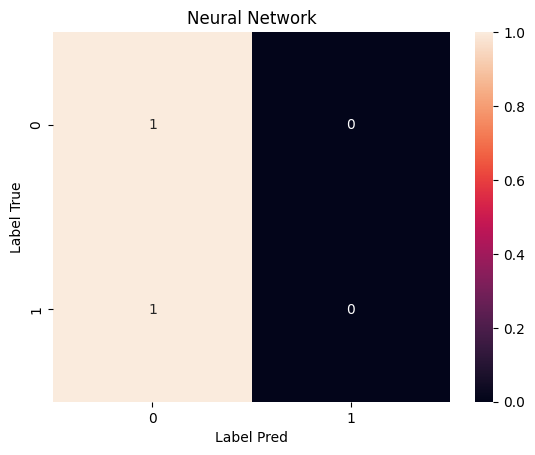

In [24]:
calcularMatrizCF(conf_matrix,"Neural Network")

In [25]:
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import keras_tuner

In [26]:
class CVTuner(keras_tuner.engine.tuner.Tuner):

    def __init__(self, data_cv, goal, hypermodel,oracle, proj_name, directory, overwrite):
                self.data_cv = data_cv
                self.goal = goal
                self.trial_scores = []
                keras_tuner.engine.tuner.Tuner.__init__(self, hypermodel=hypermodel, oracle=oracle, project_name = proj_name,
                                                       directory=directory, overwrite=overwrite)


    def run_trial(self, trial, x, y, batch_size=32, epochs=1):

        val_f1 = []
        val_auc= []
        val_acc = []

        for train_indices, test_indices in self.data_cv.split(x, y):

            x_train, x_test = x[train_indices], x[test_indices]
            y_train, y_test = y[train_indices], y[test_indices]

            model = self.hypermodel.build(trial.hyperparameters)

            callback=[keras.callbacks.EarlyStopping(monitor=self.goal, mode='max', patience=2)]

            model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,callbacks = callback)
            y_pred = model.predict(x_test)
            f1 = model.evaluate(x_test, y_test)
            auc = roc_auc_score(y_test,y_pred, average='weighted')
            acc = accuracy_score(y_test,np.round(y_pred))
            val_auc.append(auc)
            val_f1.append(f1)
            val_acc.append(acc)

        val_f1 = np.array(val_f1)[:,1]
        val_auc = np.array(val_auc)
        val_acc = np.array(val_acc)
        self.trial_scores.append({'id':trial.trial_id,
                                'hyperparams':trial.hyperparameters.values,
                                'f1': np.mean(val_f1),
                                'f1_std': np.std(val_f1),
                                'Roc_auc': np.mean(val_auc),
                                'Roc_auc_std': np.std(val_auc),
                                'Accuracy': np.mean(val_acc),
                                'Accuracy_std': np.std(val_acc)
                                 })

        self.oracle.update_trial(trial.trial_id, {self.goal: np.mean(val_f1)})

In [27]:
def build_model_Simple(hp):

    input_data = Input(shape=(X_train.shape[1],))
    x_1 = Dense(hp.Int('input_units',min_value=100,max_value=200,step=20),'relu')(input_data)
    x_2 = Dropout(0.3)(x_1)
    x_3 = Dense(hp.Int('Dense_1',min_value=50,max_value=100,step=20),'relu')(x_2)
    x_3 = Dense(hp.Int('Dense_2',min_value=30,max_value=50,step=5),'relu')(x_2)
    x_3 = Dense(hp.Int('Dense_3',min_value=10,max_value=30,step=5),'relu')(x_2)
    x_3 = Dropout(0.3)(x_3)
    x_4 = Dense(1,'sigmoid')(x_3)
    model = Model(inputs=input_data, outputs=x_4, name='Simple_Model')
    opt = tf.keras.optimizers.Nadam(clipnorm = 1.0)#,global_clipnorm=1)
    model.compile(optimizer=opt, loss="binary_crossentropy",metrics=[f1]) #

    return model

In [28]:
from skmultilearn.model_selection import IterativeStratification

In [30]:
cv = StratifiedKFold(n_splits=5)

In [31]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [32]:
tuner_Simple = CVTuner(
                    data_cv= cv,
                    goal = 'f1',
                    hypermodel=build_model_Simple,
                    oracle=keras_tuner.oracles.BayesianOptimizationOracle(
                    objective=kt.Objective('f1',direction = "max"),
                        max_trials=20
                    ),
                    directory='./experiments/',
                    proj_name = 'neuralnets',
                    overwrite=True
                    )
tuner_Simple.search(X_train, y_train, 128, epochs=15)

Trial 20 Complete [00h 00m 16s]
f1: 0.0

Best f1 So Far: 0.023934557288885116
Total elapsed time: 00h 05m 17s


In [33]:
df_results = pd.DataFrame(tuner_Simple.trial_scores)

In [34]:
df_results

,id,hyperparams,f1,f1_std,Roc_auc,Roc_auc_std,Accuracy,Accuracy_std
0,00,"{'input_units': 140, 'Dense_1': 70, 'Dense_2':...",0.000000,0.000000,0.497964,0.005170,0.967735,0.000409
1,01,"{'input_units': 180, 'Dense_1': 70, 'Dense_2':...",0.000000,0.000000,0.493273,0.022018,0.967735,0.000409
2,02,"{'input_units': 120, 'Dense_1': 90, 'Dense_2':...",0.023935,0.029314,0.509969,0.020047,0.869306,0.181667
3,03,"{'input_units': 140, 'Dense_1': 70, 'Dense_2':...",0.011116,0.022232,0.503502,0.023081,0.913285,0.108999
4,04,"{'input_units': 180, 'Dense_1': 50, 'Dense_2':...",0.000000,0.000000,0.498993,0.009351,0.967735,0.000409
5,05,"{'input_units': 140, 'Dense_1': 70, 'Dense_2':...",0.000000,0.000000,0.519474,0.029178,0.967735,0.000409
6,06,"{'input_units': 180, 'Dense_1': 50, 'Dense_2':...",0.000000,0.000000,0.506456,0.018454,0.967735,0.000409
7,07,"{'input_units': 160, 'Dense_1': 70, 'Dense_2':...",0.000000,0.000000,0.496929,0.015034,0.967735,0.000409
8,08,"{'input_units': 140, 'Dense_1': 70, 'Dense_2':...",0.012351,0.024703,0.508087,0.016616,0.867001,0.194264
9,09,"{'input_units': 140, 'Dense_1': 70, 'Dense_2':...",0.004444,0.008889,0.507528,0.019566,0.967945,0.000511


In [35]:
df_results.loc[13]['hyperparams']

{'input_units': 120, 'Dense_1': 90, 'Dense_2': 30, 'Dense_3': 10}

In [36]:
def best_model():
    input_data = Input(shape=(X_train.shape[1],))
    x_1 = Dense(100,'relu')(input_data)
    x_2 = Dropout(0.3)(x_1)
    x_3 = Dense(90,'relu')(x_2)
    x_3 = Dense(40,'relu')(x_2)
    x_3 = Dense(15,'relu')(x_2)
    x_3 = Dropout(0.3)(x_3)
    x_4 = Dense(1,'sigmoid')(x_3)
    model = Model(inputs=input_data, outputs=x_4, name='Simple_Model')
    opt = tf.keras.optimizers.Nadam(clipnorm = 1.0)#,global_clipnorm=1)
    model.compile(optimizer=opt, loss="binary_crossentropy",metrics=[f1]) #
    return model

In [37]:
best_model = best_model()

In [38]:
best_model.fit(X_train, y_train, batch_size=256, epochs=30, validation_split=0.2)

Epoch 1/30
15/15 [==============================] - 3s 23ms/step - loss: 489837632.0000 - f1: 0.0602 - val_loss: 42907556.0000 - val_f1: 0.0394
Epoch 2/30
15/15 [==============================] - 0s 7ms/step - loss: 50473076.0000 - f1: 0.0697 - val_loss: 48193400.0000 - val_f1: 0.0000e+00
Epoch 3/30
15/15 [==============================] - 0s 8ms/step - loss: 24394816.0000 - f1: 0.0111 - val_loss: 22348278.0000 - val_f1: 0.0000e+00
Epoch 4/30
15/15 [==============================] - 0s 8ms/step - loss: 15426583.0000 - f1: 0.0230 - val_loss: 7439208.5000 - val_f1: 0.0000e+00
Epoch 5/30
15/15 [==============================] - 0s 8ms/step - loss: 6902157.0000 - f1: 0.0354 - val_loss: 2546272.5000 - val_f1: 0.0000e+00
Epoch 6/30
15/15 [==============================] - 0s 8ms/step - loss: 2417312.0000 - f1: 0.0250 - val_loss: 676989.4375 - val_f1: 0.0000e+00
Epoch 7/30
15/15 [==============================] - 0s 6ms/step - loss: 1106694.1250 - f1: 0.0095 - val_loss: 108923.8281 - val_f1: 

In [39]:
y_pred = model.predict(X_test)

64/64 [==============================] - 0s 3ms/step


In [40]:
conf_matrix = confusion_matrix(y_test,y_pred)

[[1 0]
 [1 0]]


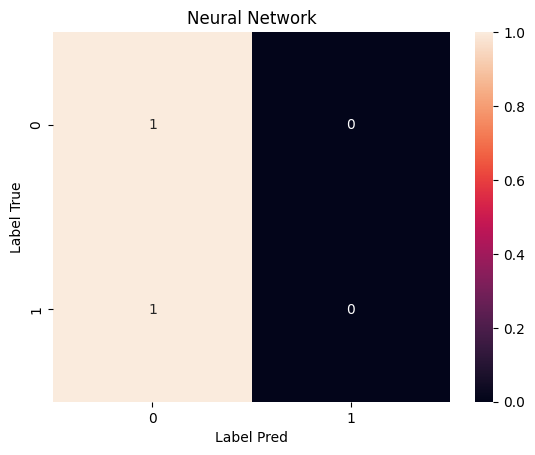

In [41]:
calcularMatrizCF(conf_matrix,"Neural Network")